# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Azzam Mujahid
- **Email:** azzam.project15@gmail.com
- **ID Dicoding:** m891d5y0342

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Produk apa yang paling banyak terjual dan paling sedikit terjual?
- **Pertanyaan 2:** Bagaimana performa penjualan (revenue) platform E-commerce seiring berjalannya waktu?
- **Pertanyaan 3:** Bagaimana demografi pelanggan berdasarkan negara bagian (state) asal mereka?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('data/customers_dataset.csv')

geolocation_df = pd.read_csv('data/geolocation_dataset.csv')

order_items_df = pd.read_csv('data/order_items_dataset.csv')

order_payments_df = pd.read_csv('data/order_payments_dataset.csv')

order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')

orders_df = pd.read_csv('data/orders_dataset.csv')

product_category_df = pd.read_csv("data/product_category_name_translation.csv")

products_df = pd.read_csv("data/products_dataset.csv")

sellers_df = pd.read_csv("data/sellers_dataset.csv")

**Insight:**
- Terdapat 9 dataset utama yang telah berhasil dimuat. Dataset ini sangat komprehensif dan mencakup seluruh aspek operasional e-commerce, mulai dari data demografi pelanggan, detail pesanan, informasi produk, hingga data penjual (sellers).
- Karena struktur data ini bersifat relasional (terpisah dalam berbagai tabel), kita nantinya perlu melakukan penggabungan data (*merging* atau *joining*) menggunakan kolom kunci seperti `order_id`, `customer_id`, dan `product_id` agar bisa melakukan analisis yang utuh dan menjawab pertanyaan bisnis.

### Assessing Data

In [3]:
def check_data(df, name):
    print(f'Dataset: {name}')
    df.info()
    print(f'\nMissing Values: \n {df.isnull().sum()}')
    print(f'\nDuplicated: \n {df.duplicated().sum()}')

check_data(customers_df, 'Customers')
check_data(orders_df, 'Orders')
check_data(products_df, 'Products')
check_data(order_items_df, 'Order Items')

Dataset: Customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Missing Values: 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Duplicated: 
 0
Dataset: Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0  

**Insight:**
- Keseluruhan data tidak memiliki data duplikat (Duplicated: 0), yang berarti data terhindar dari pencatatan ganda. Tabel `customers_df` dan `order_items_df` juga sudah bersih dari *missing values* (nilai kosong).
- Terdapat kesalahan tipe data pada tabel `orders_df` dan `order_items_df`. Kolom yang berisi informasi waktu/tanggal (seperti `order_purchase_timestamp`, `order_approved_at`, `shipping_limit_date`) masih bertipe `object` (string) dan harus diubah menjadi tipe `datetime`.
- Terdapat *missing values* pada tabel `orders_df` (pada kolom waktu persetujuan dan pengiriman barang) serta pada tabel `products_df` (terdapat 610 produk yang tidak memiliki nama kategori). Hal ini wajar terjadi (misal: pesanan dibatalkan sehingga tidak ada tanggal kirim) dan akan kita tangani pada tahap *Data Cleaning*.

### Cleaning Data

In [4]:
datetime_columns = [
    "order_purchase_timestamp", 
    "order_approved_at", 
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

products_df["product_category_name"].fillna("Unknown", inplace=True)

products_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

products_df["product_category_name_english"].fillna(products_df["product_category_name"], inplace=True)
products_df.drop(columns=["product_category_name"], inplace=True)
products_df.rename(columns={"product_category_name_english": "product_category"}, inplace=True)

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Tipe data pada kolom-kolom yang berisi informasi tanggal/waktu di dataset `orders_df` telah berhasil diubah dari `object` menjadi `datetime64[ns]`. Langkah ini sangat penting agar kita bisa melakukan manipulasi dan analisis data berbasis waktu (time-series analysis) dengan mudah di tahap selanjutnya.
- Penanganan nilai kosong (*missing values*) pada dataset `products_df` telah dilakukan dengan mengganti nilai yang hilang menjadi "Unknown". Selain itu, dilakukan standardisasi nama kategori produk ke dalam bahasa Inggris menggunakan data translasi. Hal ini akan sangat memudahkan dalam memahami nama produk saat membuat visualisasi data nanti.

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:

all_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

all_df = pd.merge(
    left=all_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

all_df = pd.merge(
    left=all_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
print("Ukuran data setelah penggabungan:", all_df.shape)
all_df.head()

Ukuran data setelah penggabungan: (113425, 26)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,1.0,400.0,19.0,13.0,19.0,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,1.0,420.0,24.0,19.0,21.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,3.0,450.0,30.0,10.0,20.0,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,4.0,250.0,51.0,15.0,15.0,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [6]:
print("Statistik Harga & Ongkir:")
print(all_df[['price', 'freight_value']].describe())

print("\nJumlah Pelanggan per State:")
all_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

Statistik Harga & Ongkir:
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000

Jumlah Pelanggan per State:


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

**Insight:**
- Data telah digabungkan menjadi sebuah DataFrame utuh bernama `all_df`. Dari eksplorasi awal terkait demografi pelanggan, terlihat bahwa mayoritas pelanggan (pembeli) berasal dari negara bagian SP (São Paulo), dan diikuti oleh RJ (Rio de Janeiro).
- Berdasarkan statistik harga (price) dan ongkos kirim (freight), rata-rata harga produk yang terjual adalah sekitar 120.65. Terdapat rentang harga yang sangat luas, mulai dari produk termurah seharga 0.85 hingga produk termahal mencapai 6735.00. 
- Menariknya, pada ongkos kirim (`freight_value`) terdapat nilai minimum 0.00. Hal ini mengindikasikan bahwa E-commerce pernah memberikan layanan promosi gratis ongkos kirim (*free shipping*) kepada pelanggannya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\NITRO\AppData\Local\Temp\ipykernel_22300\4187020302.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
C:\Users\NITRO\AppData\Local\Temp\ipykernel_22300\4187020302.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])


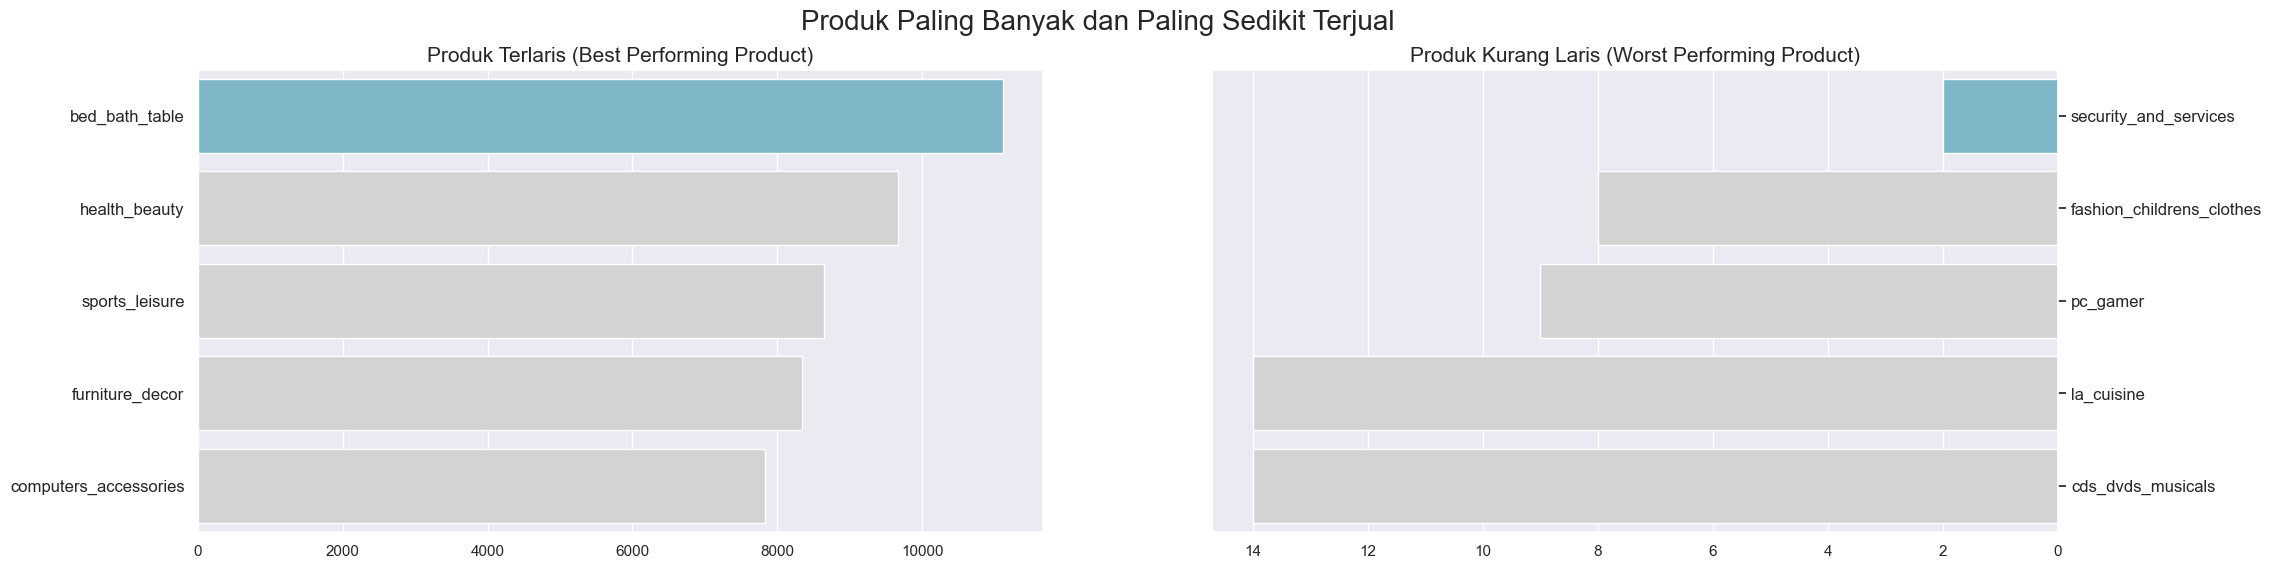

In [7]:
sum_order_items_df = all_df.groupby("product_category").order_id.count().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Terlaris (Best Performing Product)", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_id", y="product_category", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk Kurang Laris (Worst Performing Product)", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Produk Paling Banyak dan Paling Sedikit Terjual", fontsize=20)
plt.show()

### Pertanyaan 2:

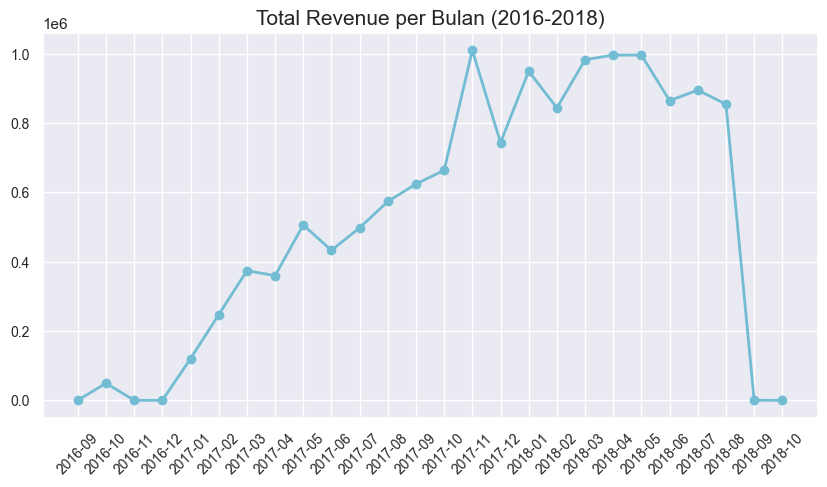

In [8]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Total Revenue per Bulan (2016-2018)", fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

C:\Users\NITRO\AppData\Local\Temp\ipykernel_22300\3076207203.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\NITRO\AppData\Local\Temp\ipykernel_22300\3076207203.py:6: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


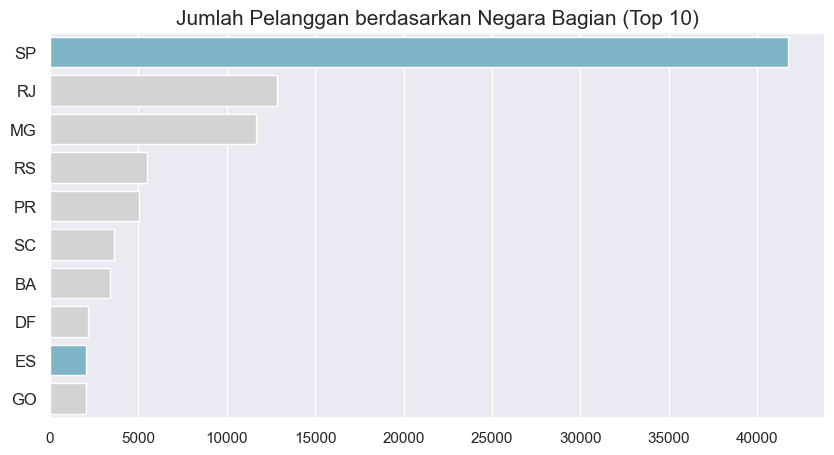

In [14]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={"customer_id": "customer_count"}, inplace=True)

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10), 
    palette=colors_
)
plt.title("Jumlah Pelanggan berdasarkan Negara Bagian (Top 10)", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- **Performa Produk:** Berdasarkan grafik, kategori produk `bed_bath_table` adalah yang paling laris dan mendominasi penjualan. Hal ini menunjukkan tingginya minat pelanggan terhadap produk perlengkapan rumah. Sebaliknya, produk dengan penjualan terendah adalah kategori `security_and_services`.
- **Tren Pendapatan (Revenue):** Tren pendapatan bulanan menunjukkan pertumbuhan yang positif sejak awal 2017 dan mencapai puncak tertingginya (peak) pada bulan **November 2017** (kemungkinan besar didorong oleh event diskon akhir tahun seperti Black Friday). *Catatan: Penurunan drastis pada bulan September dan Oktober 2018 kemungkinan besar disebabkan oleh data transaksi yang tidak terekam penuh hingga akhir bulan tersebut pada dataset.*
- **Demografi Pelanggan:** Distribusi pelanggan sangat terpusat di negara bagian **SP (São Paulo)**. Jarak jumlah pelanggan di SP sangat jauh mendominasi dibandingkan negara bagian di posisi kedua dan ketiga, yaitu RJ (Rio de Janeiro) dan MG (Minas Gerais).

## Analisis Lanjutan (Opsional)

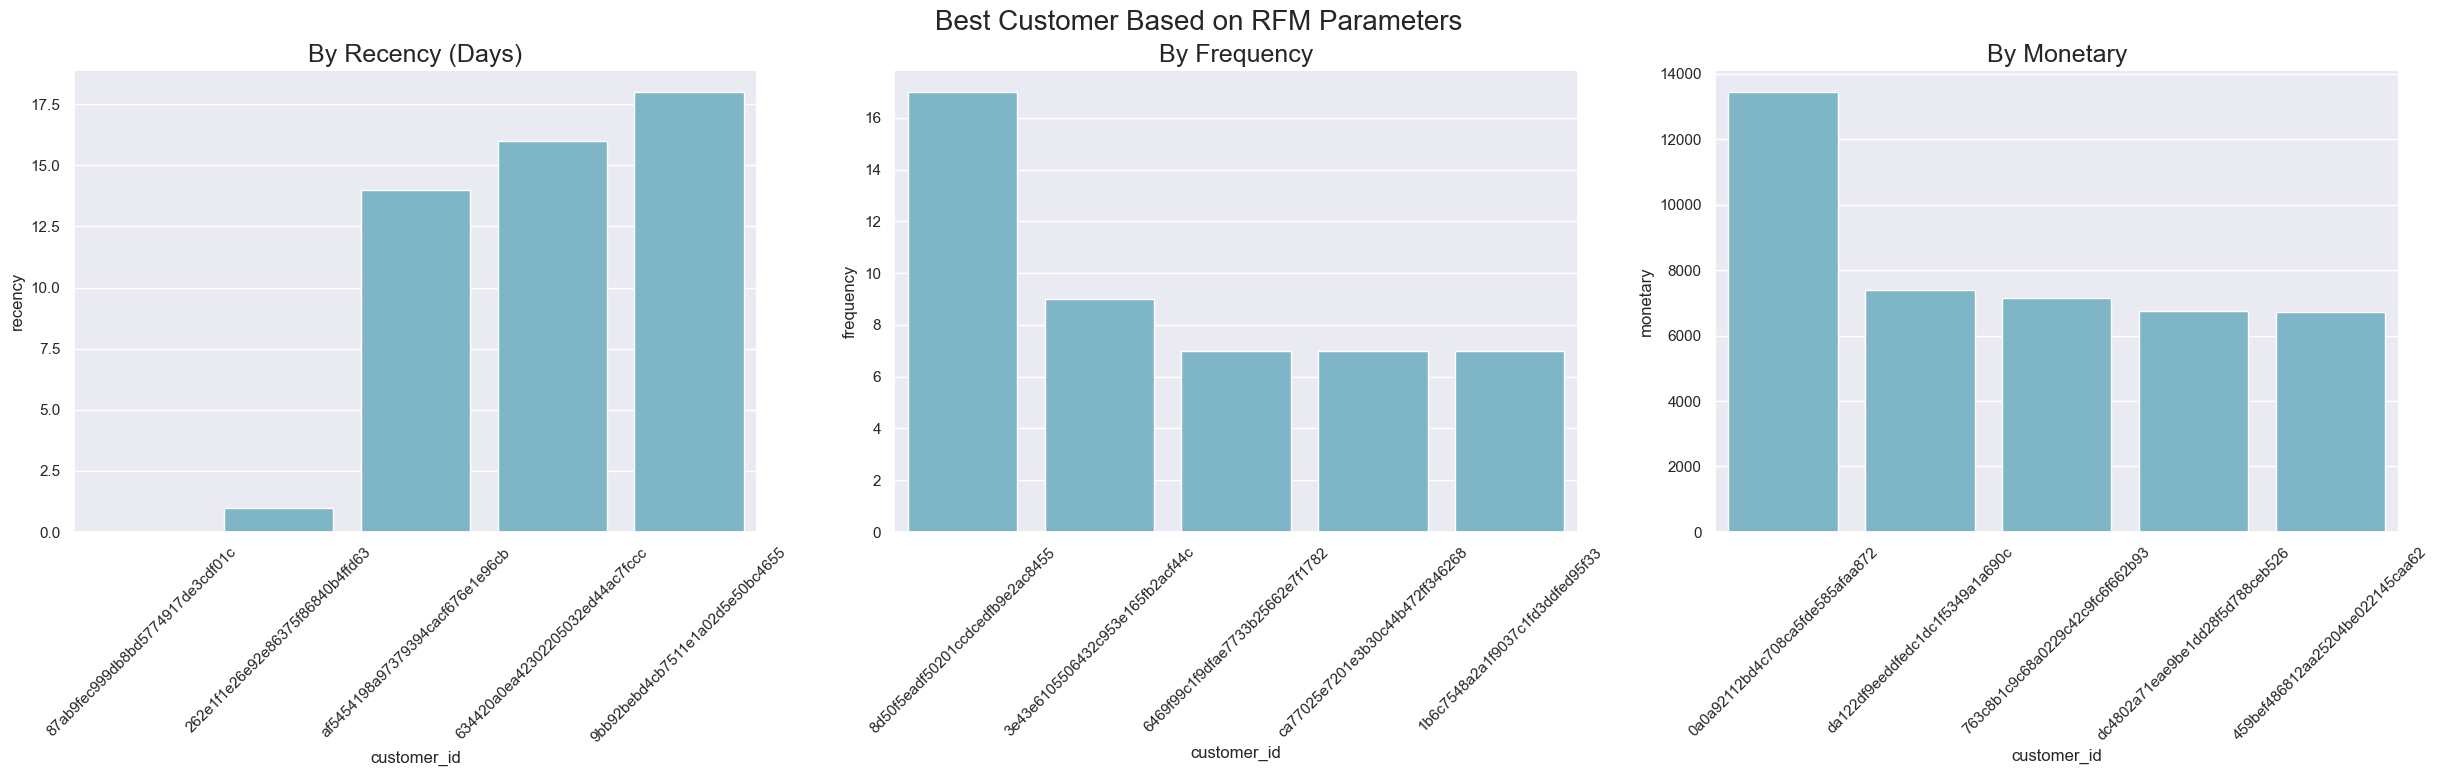

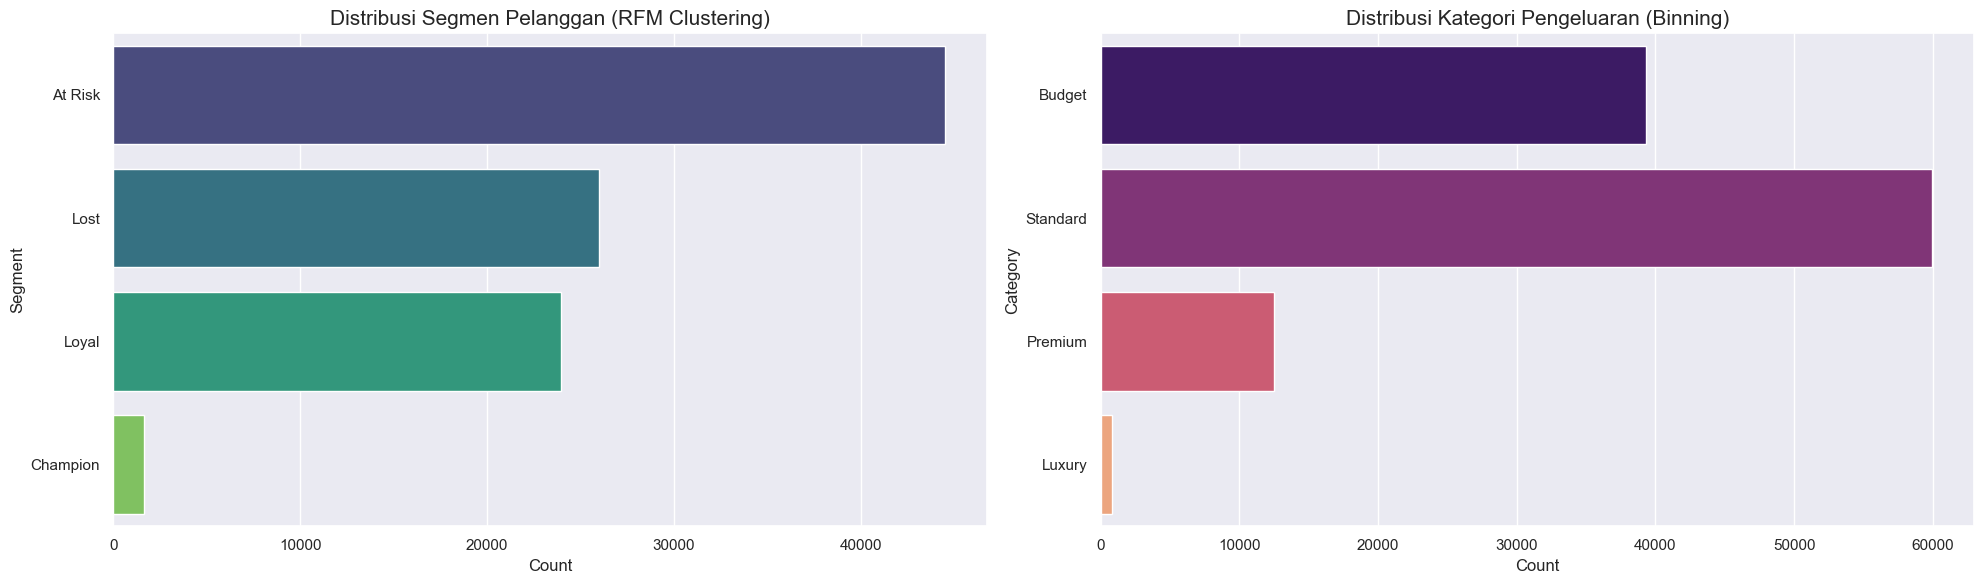

In [ ]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", 
    "order_id": "nunique",         
    "price": "sum"                    
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Menghitung Recency
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# Membuat skor peringkat untuk R, F, M
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

# Normalisasi skor menjadi skala 1-5
rfm_df['r_score'] = (rfm_df['r_rank'] / rfm_df['r_rank'].max()) * 5
rfm_df['f_score'] = (rfm_df['f_rank'] / rfm_df['f_rank'].max()) * 5
rfm_df['m_score'] = (rfm_df['m_rank'] / rfm_df['m_rank'].max()) * 5

# Menghitung skor gabungan
rfm_df['rfm_score'] = 0.4 * rfm_df['r_score'] + 0.3 * rfm_df['f_score'] + 0.3 * rfm_df['m_score']

# Fungsi untuk menentukan segmen pelanggan
def segment_customer(score):
    if score >= 4: return "Champion"
    elif score >= 3: return "Loyal"
    elif score >= 2: return "At Risk"
    else: return "Lost"

rfm_df['customer_segment'] = rfm_df['rfm_score'].apply(segment_customer)
bins = [0, 50, 200, 1000, all_df['price'].max()]
labels = ['Budget', 'Standard', 'Premium', 'Luxury']
all_df['spending_category'] = pd.cut(all_df['price'], bins=bins, labels=labels, include_lowest=True)

# A. Visualisasi Parameter RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0], hue="customer_id", legend=False)
ax[0].set_title("By Recency (Days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', rotation=45)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1], hue="customer_id", legend=False)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', rotation=45)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2], hue="customer_id", legend=False)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis ='x', rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters", fontsize=20)
plt.show()

# B. Visualisasi Hasil Clustering & Binning
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

segment_df = rfm_df['customer_segment'].value_counts().reset_index()
segment_df.columns = ['Segment', 'Count']
sns.barplot(x='Count', y='Segment', data=segment_df, palette="viridis", ax=ax[0], hue="Segment", legend=False)
ax[0].set_title("Distribusi Segmen Pelanggan (RFM Clustering)", fontsize=15)

spending_df = all_df['spending_category'].value_counts().reset_index()
spending_df.columns = ['Category', 'Count']
sns.barplot(x='Count', y='Category', data=spending_df, palette="magma", ax=ax[1], hue="Category", legend=False)
ax[1].set_title("Distribusi Kategori Pengeluaran (Binning)", fontsize=15)

plt.tight_layout()
plt.show()

## Conclusion

- **Conclusion Pertanyaan 1:** Produk yang paling banyak diminati (paling laris) adalah kategori **bed_bath_table**, sedangkan produk yang paling sedikit terjual adalah kategori **security_and_services**. Hal ini menunjukkan preferensi kuat pelanggan dalam berbelanja kebutuhan perlengkapan rumah.
- **Conclusion Pertanyaan 2:** Performa penjualan mengalami fluktuasi sepanjang waktu, namun terlihat lonjakan tren (*peak*) yang sangat signifikan pada bulan **November 2017**. Hal ini kemungkinan besar dipengaruhi oleh momen diskon akhir tahun seperti *Black Friday*. 
- **Conclusion Pertanyaan 3:** Mayoritas pelanggan E-Commerce ini berasal dari negara bagian **SP (São Paulo)**, dengan jumlah yang mendominasi sangat jauh dibandingkan negara bagian lainnya seperti RJ (Rio de Janeiro) dan MG (Minas Gerais). Infrastruktur logistik dan kampanye marketing sebaiknya dioptimalkan di area SP.

**Insight Analisis Lanjutan (Clustering & Binning):**
- **Manual Grouping (RFM Segmentation):** Melalui teknik segmentasi manual berdasarkan aturan bisnis (Recency, Frequency, Monetary), pelanggan berhasil dikelompokkan menjadi segmen *Champion, Loyal, At Risk*, dan *Lost*. Insight ini sangat berguna untuk tim *Marketing* dalam memberikan *treatment* promosi yang spesifik tanpa perlu menggunakan model *machine learning*.
- **Binning (Kategori Pengeluaran):** Dengan teknik *binning*, rentang harga produk dikelompokkan menjadi 4 tingkat pengeluaran. Hasilnya menunjukkan bahwa mayoritas transaksi berada pada kelas **Standard** dan **Budget**. Ini membuktikan bahwa pelanggan platform lebih sensitif terhadap harga dan gemar membeli barang-barang ritel berharga terjangkau.

In [12]:
all_df.to_csv("dashboard/main_data.csv", index=False)